In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/FP-KK/dataset/train_baseline.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/FP-KK/dataset/test_baseline.csv'
train_df = pd.read_csv(train_path, encoding= 'unicode_escape')
test_df = pd.read_csv(test_path, encoding= 'unicode_escape')
merged_df = train_df.append([test_df])

In [4]:
train_df.drop(['Unnamed: 0'], inplace=True, axis=1)
train_df

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands,O,28285,14
1,Sentence: 1,of,O,15741,14
2,Sentence: 1,demonstrators,O,1523,14
3,Sentence: 1,have,O,367,14
4,Sentence: 1,marched,O,13632,14
...,...,...,...,...,...
839810,Sentence: 44529,as,O,21619,14
839811,Sentence: 44529,alternatives,O,21279,14
839812,Sentence: 44529,to,O,34610,14
839813,Sentence: 44529,oil,O,23416,14


In [5]:
test_df.drop(['Unnamed: 0'], inplace=True, axis=1)
test_df

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 4453,In,O,30235,14
1,Sentence: 4453,line,O,27488,14
2,Sentence: 4453,with,O,8856,14
3,Sentence: 4453,IMF,B-org,12526,10
4,Sentence: 4453,conditions,O,9511,14
...,...,...,...,...,...
208755,Sentence: 9999,weight,O,28563,14
208756,Sentence: 9999,in,O,7258,14
208757,Sentence: 9999,gold,O,1317,14
208758,Sentence: 9999,.,O,13264,14


In [6]:
merged_df.drop(['Unnamed: 0'], inplace=True, axis=1)
merged_df

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands,O,28285,14
1,Sentence: 1,of,O,15741,14
2,Sentence: 1,demonstrators,O,1523,14
3,Sentence: 1,have,O,367,14
4,Sentence: 1,marched,O,13632,14
...,...,...,...,...,...
208755,Sentence: 9999,weight,O,28563,14
208756,Sentence: 9999,in,O,7258,14
208757,Sentence: 9999,gold,O,1317,14
208758,Sentence: 9999,.,O,13264,14


In [7]:
# importing the module
import json
 
# Opening JSON file
def loadJSON(filename):
  data = {}
  with open(filename) as json_file:
      data = json.load(json_file)
  return data

In [18]:
idx2tag = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/idx2tag.json')
tag2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/tag2idx.json')
token2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/token2idx.json')
idx2token = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/idx2token.json')
print(idx2tag)

{'0': 'I-geo', '1': 'I-org', '2': 'B-nat', '3': 'I-eve', '4': 'B-per', '5': 'I-per', '6': 'B-geo', '7': 'B-gpe', '8': 'B-eve', '9': 'I-art', '10': 'B-org', '11': 'I-tim', '12': 'B-art', '13': 'I-gpe', '14': 'O', '15': 'I-nat', '16': 'B-tim', '17': 'ENDPAD'}


In [19]:
tag2idx = dict([key, int(value)] for key, value in tag2idx.items())
token2idx = dict([key, int(value)] for key, value in token2idx.items())
tag2idx

{'B-art': 12,
 'B-eve': 8,
 'B-geo': 6,
 'B-gpe': 7,
 'B-nat': 2,
 'B-org': 10,
 'B-per': 4,
 'B-tim': 16,
 'ENDPAD': 17,
 'I-art': 9,
 'I-eve': 3,
 'I-geo': 0,
 'I-gpe': 13,
 'I-nat': 15,
 'I-org': 1,
 'I-per': 5,
 'I-tim': 11,
 'O': 14}

In [9]:
# Groupby and collect columns
train_group = train_df.groupby(['Sentence #'], as_index=False)['Word', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))
test_group = test_df.groupby(['Sentence #'], as_index=False)['Word', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))
merged_group = merged_df.groupby(['Sentence #'], as_index=False)['Word', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [10]:
train_group

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[28285, 15741, 1523, 367, 13632, 7168, 25967, ...","[14, 14, 14, 14, 14, 14, 6, 14, 14, 14, 14, 14..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[34424, 1990, 32928, 9794, 31792, 34610, 15641...","[7, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[28347, 29190, 19208, 2838, 24041, 26531, 7258...","[14, 14, 16, 14, 14, 14, 14, 14, 6, 14, 14, 14..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]","[4139, 30932, 1336, 28550, 18536, 21258, 26975...","[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]"
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...","[30896, 25325, 14734, 12754, 18505, 433, 7325,...","[6, 14, 14, 4, 5, 14, 16, 14, 6, 14, 7, 14, 7,..."
...,...,...,...,...,...
38363,Sentence: 44525,"[President, Bush, called, on, the, United, Sta...","[B-per, I-per, O, O, O, B-geo, I-geo, O, O, O,...","[344, 19638, 28590, 29279, 3894, 18510, 6565, ...","[4, 5, 14, 14, 14, 6, 0, 14, 14, 14, 14, 14, 1..."
38364,Sentence: 44526,"[Mr., Bush, said, dependence, on, foreign, sou...","[B-per, I-per, O, O, O, O, O, O, O, O, B-geo, ...","[188, 19638, 433, 7527, 29279, 11236, 5495, 15...","[4, 5, 14, 14, 14, 14, 14, 14, 14, 14, 6, 14, ..."
38365,Sentence: 44527,"[The, president, called, for, reducing, gasoli...","[O, O, O, O, O, O, O, O, O, B-geo, O, O, O, B-...","[20005, 3610, 28590, 12209, 28521, 30306, 3119...","[14, 14, 14, 14, 14, 14, 14, 14, 14, 6, 14, 14..."
38366,Sentence: 44528,"[He, said, the, goal, can, be, met, by, increa...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[22908, 433, 3894, 32462, 14067, 26107, 19184,...","[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1..."


Pad the token and tag to get matrix representation of every sentence in the same size

In [11]:
maxlen_merged = max([len(s) for s in merged_group['Word_idx'].tolist()])
maxlen_train = max([len(s) for s in train_group['Word_idx'].tolist()])
maxlen_test = max([len(s) for s in test_group['Word_idx'].tolist()])

In [12]:
print("Merged :", maxlen_merged)
print("Train :", maxlen_train)
print("Test :", maxlen_test)

Merged : 104
Train : 104
Test : 70


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [23]:
def get_pad(dataset_grouped, merged_data, maxlen):

    #get max token and tag length
    n_token = len(list(set(merged_data['Word'].to_list())))
    n_tags = len(list(set(merged_data['Tag'].to_list())))

    #Pad tokens (X var)    
    tokens = dataset_grouped['Word_idx'].tolist()
    # maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= token2idx["ENDPAD"])

    #Pad Tags (y var) and convert it into one hot encoding
    tags = dataset_grouped['Tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]

    return pad_tokens, pad_tags, n_token

In [24]:
train_tokens, train_tags, n_token = get_pad(train_group, merged_df, maxlen_merged)
test_tokens,  test_tags, _ = get_pad(test_group, merged_df, maxlen_merged)
train_tags = np.array(train_tags)
test_tags = np.array(test_tags)
print('train_tags: ',train_tags.shape,'test_tags: ',test_tags.shape)

train_tags:  (38368, 104, 17) test_tags:  (9591, 104, 17)


In [25]:
from sklearn.utils import class_weight

train_temp_tags = np.ravel(np.argmax(train_tags, axis=-1))
print(len(train_temp_tags))

3990272


In [26]:
class_weights = class_weight.compute_class_weight(
    class_weight ='balanced', 
    classes = np.unique(train_temp_tags), 
    y = train_temp_tags
    )
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

train_label = np.argmax(train_tags, axis=-1)
print(train_tokens.shape)
print(train_label.shape)

{0: 39.389475138939616, 1: 17.280562641017536, 2: 1448.9005083514887, 3: 1173.6094117647058, 4: 17.17435299282514, 5: 16.865839071131795, 6: 7.782039730553053, 7: 18.789776044904034, 8: 978.0078431372549, 9: 931.4360410830999, 10: 14.556395804833562, 11: 44.547709689303694, 12: 735.8052738336714, 13: 1524.1680672268908, 14: 0.06078537701624224, 15: 6903.584775086505, 16: 14.443534696507363}
(38368, 104)
(38368, 104)


In [27]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input
from tensorflow.keras.utils import plot_model

In [28]:
input_dim = n_token+1
output_dim = 64
input_length = maxlen_merged
n_tags = 17

In [29]:
def get_bilstm_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length, name="embedding"))
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))
    model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    model.add((Dense(n_tags, activation="softmax")))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [30]:
# maj_index = tag2idx['O']

''' Change it More for Better Fine-Tuning '''

# class_weight_dict[maj_index] = 28.5277954105731576 
print(class_weight_dict)
sample_weights = np.ones(shape=(len(train_label), train_label.shape[-1]))
for i in range(17):
    sample_weights[train_label == i] = class_weight_dict.get(i)
print(sample_weights.shape)

{0: 39.389475138939616, 1: 17.280562641017536, 2: 1448.9005083514887, 3: 1173.6094117647058, 4: 17.17435299282514, 5: 16.865839071131795, 6: 7.782039730553053, 7: 18.789776044904034, 8: 978.0078431372549, 9: 931.4360410830999, 10: 14.556395804833562, 11: 44.547709689303694, 12: 735.8052738336714, 13: 1524.1680672268908, 14: 0.06078537701624224, 15: 6903.584775086505, 16: 14.443534696507363}
(38368, 104)


In [32]:
nlp_model = get_bilstm_lstm_model()
plot_model(nlp_model)
his = nlp_model.fit(train_tokens, train_label , batch_size = 64, epochs=5, validation_split=0.2, sample_weight = sample_weights)
tf.keras.models.save_model(nlp_model, filepath  = '/content/drive/MyDrive/Colab Notebooks/FP-KK/model/BiLSTM_kaggle_baseline_1312.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 104, 64)           2251008   
                                                                 
 bidirectional_1 (Bidirectio  (None, 104, 128)         66048     
 nal)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 104, 64)           49408     
                                                                 
 dense_1 (Dense)             (None, 104, 17)           1105      
                                                                 
Total params: 2,367,569
Trainable params: 2,367,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
480/480 [==============================] - 341s 694ms/step - loss: 2.2659 - accuracy: 0.7808 - val_l

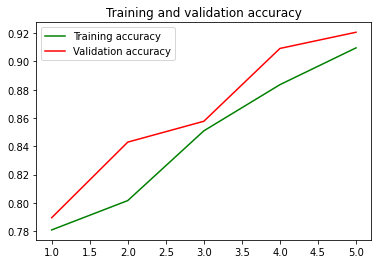

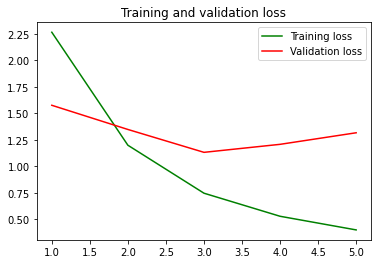

In [33]:
# Plot results
import matplotlib.pyplot as plt

accuracy = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [71]:
nlp_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/FP-KK/model/BiLSTM_kaggle_baseline_1312.h5')

y_test = np.argmax(test_tags, axis=-1)
print(test_tokens.shape,y_test.shape)
nlp_model.evaluate(test_tokens, y_test)

(9591, 104) (9591, 104)
300/300 [==============================] - 19s 62ms/step - loss: 0.2759 - accuracy: 0.9208


[0.27585935592651367, 0.9208452701568604]

In [72]:
y_pred = nlp_model.predict(test_tokens)
y_pred = np.argmax(y_pred, axis= -1)

In [73]:
print(test_tokens.shape[0])
print(y_pred[0][103])
print(y_test[0][103])
print(type(y_pred))
print(type(y_test))
y_pred_list = y_pred.tolist()
y_test_list = y_pred.tolist()
# y_pred = y_pred.tolist()
# y_test = y_pred.tolist()

9591
14
14
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [74]:
# Clean the test and pred data from padding data
clean_pred = []
clean_test = []
for row in range(0, test_tokens.shape[0]):
  # print(row, test_tokens[row])
  pad_list = []
  for i in range(0, len(test_tokens[row])):
    if(test_tokens[row][i] == token2idx['ENDPAD']):
      pad_list.append(i)

  pad_list.sort(reverse=True)
  print(pad_list)
  for idx in pad_list:
  #   clean_pred[row] = clean_pred[row] + np.delete(y_pred[row], idx)
  #   clean_test[row] = clean_test[row] + np.delete(y_test[row], idx)
    y_pred_list[row].pop(idx)
    y_test_list[row].pop(idx)

Streaming output truncated to the last 5000 lines.
[103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20]
[103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]
[103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41

In [78]:
print(len(y_pred_list))
print(len(y_test_list))

9591
9591


In [79]:
y_test_rows = []
y_pred_rows = []
for row in range(0, y_test.shape[0]):
  # y_pred_list = y_pred_list + y_pred[row]
  y_test_rows = np.concatenate((y_test_rows, y_pred_list[row]), axis=0)
  y_pred_rows = np.concatenate((y_pred_rows, y_test_list[row]), axis=0)

In [81]:
data_prediction = pd.DataFrame({'actual_class': y_test_rows, 'predicted_class': y_pred_rows})
data_prediction = data_prediction.astype('int32', copy=True)
data_prediction = data_prediction.astype(str)
data_prediction['actual_class'] = data_prediction['actual_class'].map(idx2tag)
data_prediction['predicted_class'] = data_prediction['predicted_class'].map(idx2tag)
data_prediction

,actual_class,predicted_class
0,O,O
1,O,O
2,O,O
3,B-org,B-org
4,O,O
...,...,...
208755,O,O
208756,O,O
208757,O,O
208758,O,O


In [82]:
confusion_matrix = pd.crosstab(data_prediction['predicted_class'], data_prediction['actual_class'])
confusion_matrix

actual_class,B-art,B-eve,B-geo,B-gpe,B-nat,B-org,B-per,B-tim,I-art,I-eve,I-geo,I-gpe,I-nat,I-org,I-per,I-tim,O
predicted_class,,,,,,,,,,,,,,,,,
B-art,2936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B-eve,0,1471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B-geo,0,0,23765,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B-gpe,0,0,0,5977,0,0,0,0,0,0,0,0,0,0,0,0,0
B-nat,0,0,0,0,2115,0,0,0,0,0,0,0,0,0,0,0,0
B-org,0,0,0,0,0,12764,0,0,0,0,0,0,0,0,0,0,0
B-per,0,0,0,0,0,0,7493,0,0,0,0,0,0,0,0,0,0
B-tim,0,0,0,0,0,0,0,15222,0,0,0,0,0,0,0,0,0
I-art,0,0,0,0,0,0,0,0,491,0,0,0,0,0,0,0,0


In [83]:
from sklearn.metrics import classification_report

In [84]:
pd.DataFrame(classification_report(data_prediction['actual_class'], data_prediction['predicted_class'], output_dict=True)).T

,precision,recall,f1-score,support
B-art,1.0,1.0,1.0,2936.0
B-eve,1.0,1.0,1.0,1471.0
B-geo,1.0,1.0,1.0,23765.0
B-gpe,1.0,1.0,1.0,5977.0
B-nat,1.0,1.0,1.0,2115.0
B-org,1.0,1.0,1.0,12764.0
B-per,1.0,1.0,1.0,7493.0
B-tim,1.0,1.0,1.0,15222.0
I-art,1.0,1.0,1.0,491.0
I-eve,1.0,1.0,1.0,244.0
